In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50, VGG16
from tensorflow.keras.layers import Dense, Flatten, Input
from tensorflow.keras.models import Model
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score
from tensorflow.keras.utils import to_categorical

Load CIFAR-10 dataset

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 11s 0us/step


Normalize pixel values to between 0 and 1

In [ ]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

One-hot encode the labels

In [ ]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

Choose between ResNet50 or VGG16

In [ ]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


Freeze the convolutional base

In [ ]:
for layer in base_model.layers:
    layer.trainable = False

Add custom dense layers

In [ ]:
x = base_model.output
x = Flatten()(x)
x = Dense(512, activation='relu')(x)
predictions = Dense(10, activation='softmax')(x)


Create the final model

In [ ]:
model = Model(inputs=base_model.input, outputs=predictions)

Compile the model

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Train the model

In [ ]:
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=64,
                    validation_data=(x_test, y_test))


Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 729s 929ms/step - accuracy: 0.4785 - loss: 1.4967 - val_accuracy: 0.5720 - val_loss: 1.2272
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 748s 937ms/step - accuracy: 0.5905 - loss: 1.1718 - val_accuracy: 0.5893 - val_loss: 1.1708
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 742s 937ms/step - accuracy: 0.6150 - loss: 1.1005 - val_accuracy: 0.5937 - val_loss: 1.1437
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 736s 929ms/step - accuracy: 0.6367 - loss: 1.0370 - val_accuracy: 0.6044 - val_loss: 1.1274
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 742s 930ms/step - accuracy: 0.6559 - loss: 0.9888 - val_accuracy: 0.6086 - val_loss: 1.1257
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 753s 964ms/step - accuracy: 0.6678 - loss: 0.9483 - val_accuracy: 0.6132 - val_loss: 1.1065
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 783s 939ms/step - accuracy: 0.6807 - loss: 0.9022 - val_accuracy: 0.6204 - val_loss: 1.0927
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 762s 966ms/step - accuracy: 0.6942 -

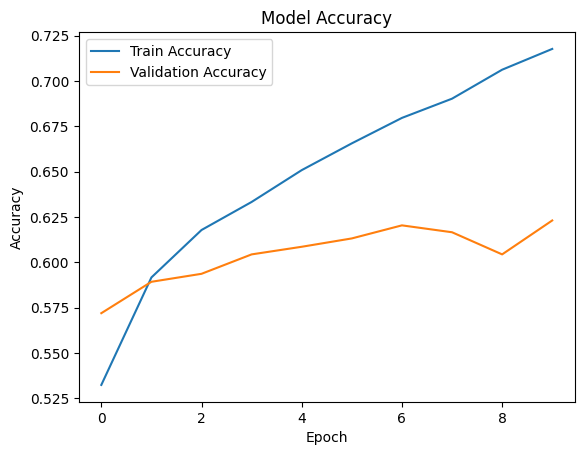

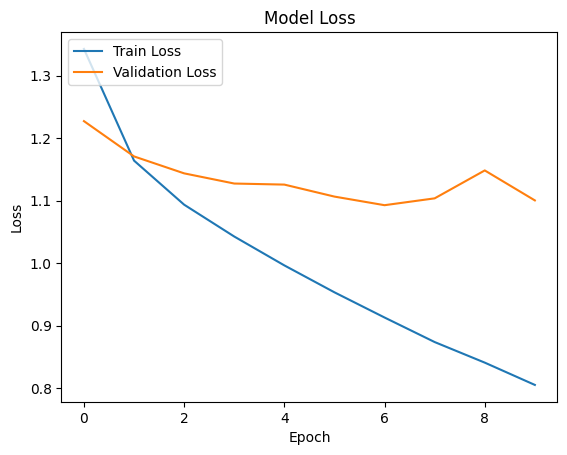

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()


In [ ]:
y_pred = model.predict(x_test)
y_pred_classes = y_pred.argmax(axis=-1)
y_true = y_test.argmax(axis=-1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 127s 403ms/step


Calculate accuracy, precision, and recall

In [ ]:
accuracy = accuracy_score(y_true, y_pred_classes)
precision = precision_score(y_true, y_pred_classes, average='weighted')
recall = recall_score(y_true, y_pred_classes, average='weighted')

In [ ]:
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")

Accuracy: 0.6231
Precision: 0.630651141776224
Recall: 0.6231


Display classification report

In [ ]:
print(classification_report(y_true, y_pred_classes))

              precision    recall  f1-score   support

           0       0.74      0.68      0.71      1000
           1       0.69      0.70      0.69      1000
           2       0.53      0.55      0.54      1000
           3       0.43      0.54      0.48      1000
           4       0.55      0.60      0.57      1000
           5       0.56      0.50      0.53      1000
           6       0.68      0.63      0.65      1000
           7       0.72      0.65      0.68      1000
           8       0.73      0.76      0.75      1000
           9       0.67      0.62      0.64      1000

    accuracy                           0.62     10000
   macro avg       0.63      0.62      0.63     10000
weighted avg       0.63      0.62      0.63     10000

